In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# kinetic parameters with assumed units:
aM = 15.1745   # 1/hr, transcription rate per nM of free DNA
aP = 1         # 1/hr, translation rate per nM of mRNA
aF = 1         # 1/hr, conversion rate from protein to repressor
bM = 1         # 1/hr, mRNA degradation rate
bP = 1         # 1/hr, protein degradation rate
bF = 1         # 1/hr, repressor degradation rate
kf = 200       # 1/(nM·hr), binding rate constant for free DNA and repressor
kb = 200       # 1/hr, unbinding rate constant for the DNA-repressor complex
DT = 165    # nM, total DNA concentration
kd= kb/kf       #  dissociation constant



In [4]:
# Define the ODE system of the full model
def full_model(t, y):
    M, P, F = y


    # Compute DA as a function of F using the derived formula:
    DA = ((kb + bF) * DT) / ((kb + bF) + kf * F)
    # DR is given by the conservation law
    DR = DT - DA
    # Define the ODEs for mRNA, protein, and free repressor
    dMdt = aM * DA - bM * M
    dPdt = aP * M - bP * P
    dFdt = aF * P - bF * F + kb * DR - kf * DA * F
    return [dMdt, dPdt, dFdt]

# # Plot results

# plt.figure(figsize=(10, 6))
# plt.plot(solution.t, solution.y[0], label="mRNA (M)")
# # plt.plot(solution.t, solution.y[1], label="Protein (P)")
# # plt.plot(solution.t, solution.y[2], label="Free repressor (F)")
# plt.plot(solution.t, solution.y[2], label="DA/DT")

# plt.xlabel("Time")
# plt.ylabel("Concentration")
# plt.legend()
# plt.title("Full ODE Model Simulation:sQSSA(deterministic,HW2)")
# plt.show()


In [5]:
# Initial condition
M0, P0, F0 = 0, 0, 0  # Start with all DNA in active form
y0 = [M0, P0, F0]

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

In [6]:
# Solve ODEs
solution = solve_ivp(full_model, t_span, y0, t_eval=t_eval)
# solution =

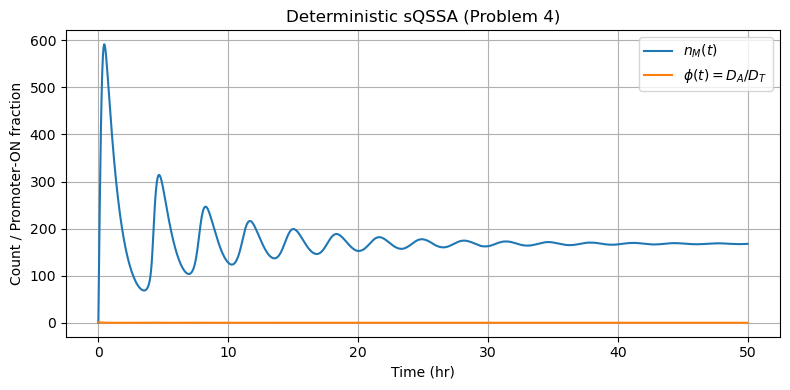

In [7]:
# extract the solution arrays
t = solution.t            # shape (N,)
M = solution.y[0]         # mRNA
F = solution.y[2]         # free repressor

# recompute D_A(t) and φ(t)
DA = ((kb + bF)*DT) / ((kb + bF) + kf*F)
phi = DA/DT

# now plot
plt.figure(figsize=(8,4))
plt.plot(t, M,  label=r'$n_M(t)$',      color='C0')
plt.plot(t, phi, label=r'$\phi(t)=D_A/D_T$',  color='C1')
plt.xlabel('Time (hr)')
plt.ylabel('Count / Promoter‐ON fraction')
plt.title('Deterministic sQSSA (Problem 4)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
